In [1]:
%cd ~/Documents/code/iris_benchmarks/
import pickle
from pydrake.all import Hyperrectangle, HPolyhedron, RandomGenerator
import numpy as np
import os
from iris_environments.environments import env_names
import yaml
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker


/home/rebecca/Documents/code/iris_benchmarks


In [2]:
# i_seed = 1
seed_nums = {}
for env_name in env_names:
    seed_nums[env_name] = [i for i in range(10)]

In [3]:
import matplotlib.pyplot as plt
import os
import pickle
# from iris_environments.environments import env_names
import numpy as np

def get_env_name(path):
    for e in env_names:
        if e in path:
            return e    

keys_stats = ['times', 'volumes', 'fraction_in_collision', 'num_faces']
axis_labels = ['time [s]', 'volume [rad^dof]', 'fraction_in_collision', 'num_faces']
stat_titles = ['Computation Time', 'Region Volume', 'Frac Region in Collision', 'Number Faces']

default_configs_to_plot = [#'config_1', 
                           #'config_2',
                        #    'config_3',
                        # 'config_precise',
                        # 'config_vfast',
                        # 'config_fast',
                        # 'config_medium',
                           ]
data = {}
for e in env_names:
    data[e] = {}
    # for c in default_configs_to_plot:
    #     data[e][f"default/{c}"] = {}

# root = os.path.dirname(os.path.abspath(__file__))
root = os.path.abspath('')
# for conf in default_configs_to_plot:
#     default_exp_path = [e for e in os.listdir(root + f"/benchmarks/default_experiments/{conf}") if e.endswith('pkl')]
#     for exp in default_exp_path:
#         env_name = get_env_name(exp)
#         with open(root + f"/benchmarks/default_experiments/{conf}/"+exp, 'rb') as f:
#             result = pickle.load(f)
            
#             data[env_name][f"default/{conf}"]['mean_stats'] = [ np.mean(result[k]) for k in keys_stats]
#             data[env_name][f"default/{conf}"]['min_stats'] = [ np.min(result[k]) for k in keys_stats]
#             data[env_name][f"default/{conf}"]['max_stats'] = [ np.max(result[k]) for k in keys_stats]



experiments_to_add = [
    # "greedy_iris/precise_after_sort",
    "ray_iris/precise_final",
    "ray_iris/precise_final_sample_dist_step_size"
    # "ray_iris/precise_final_more_steps",
    # "ray_iris/precise_all_samples",
    # "ray_iris/precise_only_collisions",
    # "fast_iris/unadaptive_balanced_final",
    # "greedy_iris/fast_after_sort",
    # "ray_iris/fast_final",
    # "ray_iris/fast_all_samples",
    # "ray_iris/fast_only_collisions",
    # "fast_iris/unadaptive_fast_final",
    ]
# names = ['vf', 'IICS_f', 'medium','FastIris_doubletest']
# names = [
#          'default medium', 
#         #  'ray iris 1', 
#         #  'max_iter_sep_planes = 40', 
#         #  'face_ray_steps = 20',
#          'batch_size = 500',
#         #  'batch_size = 1500',
#         #  'face_ray_steps_10_batch_size_500',
#         #  'only_walk_toward_collisions'
#         ]
names = default_configs_to_plot + experiments_to_add
#"['2DOFFLIPPER_641ed63424.pkl', '3DOFFLIPPER_a33a92c6d1.pkl']

for exp_name in experiments_to_add:
    # get num_trials by loading params yaml
    num_trials = {}
    for e in os.listdir(root+f"/logs/{exp_name}/parameters"):
        with open(root+f"/logs/{exp_name}/parameters/" + e, 'r') as f:
            settings = yaml.safe_load(f)
            num_trials[e.split('_')[0]] = settings["num_trials"]
    print(num_trials)

    env_experiments = []
    for e in os.listdir(root+f"/logs/{exp_name}"):
        if e[-4:] == '.pkl':
            env_experiments.append(e)
    for e in env_names:
        data[e][exp_name] = {}
    for exp in env_experiments:
        env_name = get_env_name(exp)
        with open(root + f"/logs/{exp_name}/"+exp, 'rb') as f:
            num_trials_env = num_trials[env_name]
            result = pickle.load(f)
            # data[env_name][exp_name]['mean_stats'] = [ np.mean(result[k][i_seed * num_trials_env:(i_seed + 1) * num_trials_env]) for k in keys_stats]
            # data[env_name][exp_name]['min_stats'] = [ np.min(result[k][i_seed * num_trials_env:(i_seed + 1) * num_trials_env]) for k in keys_stats]
            # data[env_name][exp_name]['max_stats'] = [ np.max(result[k][i_seed * num_trials_env:(i_seed + 1) * num_trials_env]) for k in keys_stats]
            data[env_name][exp_name]['mean_stats'] = []
            data[env_name][exp_name]['min_stats'] = []
            data[env_name][exp_name]['max_stats']= []
            for k in keys_stats:
                stats = np.array([])
                for i_seed in seed_nums[env_name]:
                    stats = np.hstack((stats, result[k][i_seed * num_trials_env:(i_seed + 1) * num_trials_env]))
                
                data[env_name][exp_name]['mean_stats'].extend(np.mean(stats)) 
                data[env_name][exp_name]['min_stats'].extend(np.min(stats)) 
                data[env_name][exp_name]['max_stats'].extend(np.max(stats)) 

            print(result)


{'6DOFUR3': 10, '15DOFALLEGRO': 10, '5DOFUR3': 10, '14DOFIIWAS': 10, '7DOF4SHELVES': 10, '7DOFIIWA': 10, '3DOFFLIPPER': 10, '7DOFBINS': 10}
{'regions': [<pydrake.geometry.optimization.HPolyhedron object at 0x7e938d416270>, <pydrake.geometry.optimization.HPolyhedron object at 0x7e938d2e6fb0>, <pydrake.geometry.optimization.HPolyhedron object at 0x7e938d163eb0>, <pydrake.geometry.optimization.HPolyhedron object at 0x7e938d490470>, <pydrake.geometry.optimization.HPolyhedron object at 0x7e938d173230>, <pydrake.geometry.optimization.HPolyhedron object at 0x7e938d171730>, <pydrake.geometry.optimization.HPolyhedron object at 0x7e938e9f1670>, <pydrake.geometry.optimization.HPolyhedron object at 0x7e938d164eb0>, <pydrake.geometry.optimization.HPolyhedron object at 0x7e938d1507b0>, <pydrake.geometry.optimization.HPolyhedron object at 0x7e938d2af870>, <pydrake.geometry.optimization.HPolyhedron object at 0x7e938d14dd70>, <pydrake.geometry.optimization.HPolyhedron object at 0x7e938d28d1b0>, <pydrak

In [11]:
data[env_name][exp_name]['max_stats']

[0.559556245803833,
 1.0449447631835938,
 0.3528001308441162,
 0.49756789207458496,
 0.501204252243042,
 0.979238748550415,
 0.6004953384399414,
 0.5382702350616455,
 0.5817842483520508,
 0.29222631454467773,
 0.015756306333617482,
 0.010409390401326822,
 2.5904447888293296,
 138.79939296177977,
 27.56820807171228,
 420.49103174200053,
 0.029163834788949548,
 54.475864182244194,
 677.7988757073733,
 0.19694824330942257,
 0.0008,
 0.0002,
 0.0026,
 0.0006,
 0.0032,
 0.001,
 0.0006,
 0.0022,
 0.0058,
 0.003,
 26,
 33,
 29,
 31,
 29,
 38,
 25,
 32,
 29,
 30]

In [10]:
a.extend(np.array([1,2,3]))

AttributeError: 'numpy.ndarray' object has no attribute 'extend'

In [8]:
np.shape(result['times'])

(100,)

In [5]:
np.mean(result['times'])

0.5707247519493103

In [13]:
i_seed = 0

In [14]:
[ np.mean(result[k][i_seed * num_trials_env:(i_seed + 1) * num_trials_env]) for k in keys_stats]

[0.542141056060791, 0.01565445070803797, 0.00048000000000000007, 26.0]

In [4]:
f

<_io.BufferedReader name='/home/rebecca/Documents/code/iris_benchmarks/logs/ray_iris/precise_final_sample_dist_step_size/6DOFUR3_8b4dda8c04.pkl'>

In [ ]:
np.mean(result)

/tmp/ipykernel_996773/893604106.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_996773/893604106.py:72: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0,0),1,1, color=colors[i], alpha=0.6, edgecolor='none') for i in range(len(experiments))]


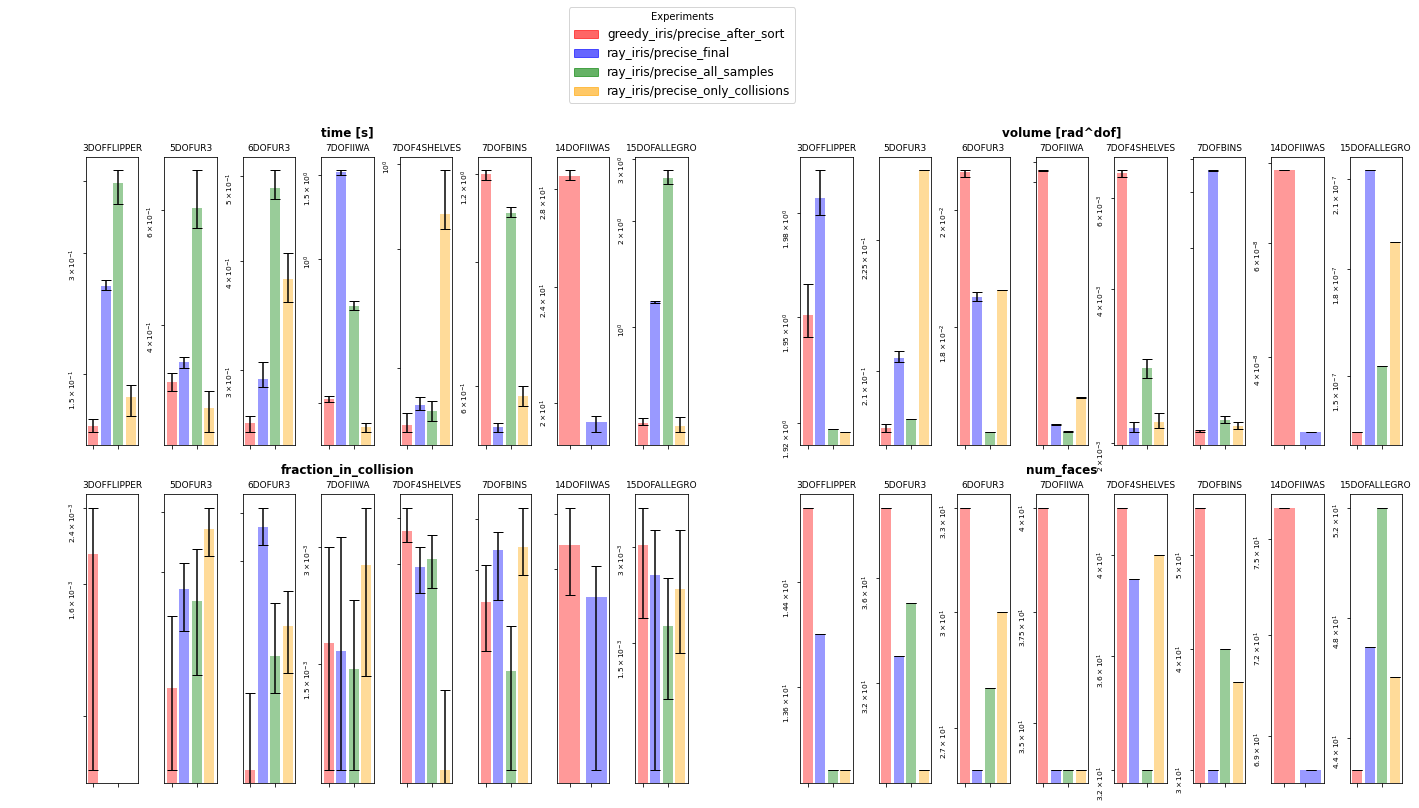

In [4]:
bar_width = 10
colors = ['red', 'blue', 'green', 'orange']

with open('iris_environments/env_statistics.txt', 'r') as f:
    lines = f.readlines()
env_stats = {}
for l in lines[1:]:
    chunks = l.split(',')
    stats = [int(chunks[0]), float(chunks[1]), float(chunks[2])]
    env_stats[chunks[-1].strip('\n').strip(' ')] = stats

fig = plt.figure(figsize=(25, 12))
outer_grid = gridspec.GridSpec(2, 2, wspace=0.05, hspace=0.17)
for statid, k in enumerate(keys_stats):
    experiments = list(data[env_names[0]].keys())
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, len(env_names), subplot_spec=outer_grid[statid], wspace=0.5)
    for i_env, e in enumerate(env_names):
        ax = plt.Subplot(fig, inner_grid[i_env])
        
        for i_exp, exp in enumerate(experiments):
            xloc = []
            min_stats = []
            max_stats = []
            mean_stats = []
            vols = []
            if 'mean_stats' in data[e][exp].keys():
                min_stats = data[e][exp]['min_stats'][statid]
                max_stats = data[e][exp]['max_stats'][statid]
                mean_stats = data[e][exp]['mean_stats'][statid]
                vols = 1 # replace with appropriate value or logic if needed
                ax.set_yscale('log')
                if 'volume' in axis_labels[statid]:
                    mean_stats /= vols
                    min_stats /= vols
                    max_stats /= vols

                err = np.array([[mean_stats - min_stats], [max_stats - mean_stats]])
        
                ax.bar(i_exp * 1.25 * bar_width, mean_stats, width=bar_width, color=colors[i_exp], yerr=err, capsize=5, label=exp, alpha=0.4, edgecolor='none')
                
                # Apply scientific notation
                # ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
                # ax.yaxis.get_major_formatter().set_scientific(True)
                # ax.yaxis.get_major_formatter().set_powerlimits((0, 0))

                # Reduce the number of y-ticks
                ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3, prune=None))
                ax.yaxis.set_minor_locator(ticker.MaxNLocator(nbins=3, prune=None))
                # ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=2))
                # ax.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs='auto', numticks=1))

                ax.set_title(e, fontsize=9)
                ax.tick_params(axis='y', which='both', labelrotation=90, labelsize=7.5)

                fig.add_subplot(ax)
        
        ax.set_xticklabels([])
        
        # # Rotate y-axis tick labels
        # for label in ax.get_yticklabels():
        #     label.set_rotation(90)

    ax_outer = fig.add_subplot(outer_grid[statid])
    ax_outer.set_title(axis_labels[statid], pad=20, fontweight='bold')
    ax_outer.axis('off')  # Hide the axis to make it clean

# Adjust layout to make space for the main title
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Add a single legend for the entire figure
handles = [plt.Rectangle((0,0),1,1, color=colors[i], alpha=0.6, edgecolor='none') for i in range(len(experiments))]
labels = experiments
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), fontsize='large', title='Experiments')

plt.show()

In [11]:
data["3DOFFLIPPER"]

{'greedy_iris/precise_after_sort': {'mean_stats': [0.1115450143814087,
   1.9504269627665232,
   0.0018799999999999997,
   15.0],
  'min_stats': [0.10793209075927734, 1.9441541292234648, 0.0006, 15],
  'max_stats': [0.11657023429870605, 1.9592839756463467, 0.0024, 15]},
 'ray_iris/precise_final': {'mean_stats': [0.24752144813537597,
   1.9841677414312944,
   0.0,
   14.0],
  'min_stats': [0.24211430549621582, 1.9793768383153918, 0.0, 14],
  'max_stats': [0.25667595863342285, 1.992474386052437, 0.0, 14]},
 'ray_iris/precise_all_samples': {'mean_stats': [0.44732253551483153,
   1.918132509466212,
   0.0,
   13.0],
  'min_stats': [0.39578723907470703, 1.9181325094662123, 0.0, 13],
  'max_stats': [0.4808542728424072, 1.9181325094662123, 0.0, 13]},
 'ray_iris/precise_only_collisions': {'mean_stats': [0.13224852085113525,
   1.9172859507200883,
   0.0,
   13.0],
  'min_stats': [0.11839604377746582, 1.9172859507200883, 0.0, 13],
  'max_stats': [0.14103341102600098, 1.9172859507200883, 0.0, 13

In [8]:
experiments

['greedy_iris/precise_after_sort',
 'ray_iris/precise_final',
 'ray_iris/precise_all_samples',
 'ray_iris/precise_only_collisions']

In [13]:
env_experiments

['6DOFUR3_2e36b71ab9.pkl',
 '7DOFIIWA_2e36b71ab9.pkl',
 '7DOF4SHELVES_2e36b71ab9.pkl',
 '7DOFBINS_2e36b71ab9.pkl',
 '15DOFALLEGRO_2e36b71ab9.pkl',
 '3DOFFLIPPER_c8cdd4ca15.pkl',
 '5DOFUR3_2e36b71ab9.pkl']

In [14]:
data

{'2DOFFLIPPER': {'greedy_iris/precise_after_sort': {},
  'ray_iris/precise_final': {},
  'ray_iris/precise_all_samples': {},
  'ray_iris/precise_only_collisions': {}},
 '3DOFFLIPPER': {'greedy_iris/precise_after_sort': {'mean_stats': [0.1115450143814087,
    1.9504269627665232,
    0.0018799999999999997,
    15.0],
   'min_stats': [0.10793209075927734, 1.9441541292234648, 0.0006, 15],
   'max_stats': [0.11657023429870605, 1.9592839756463467, 0.0024, 15]},
  'ray_iris/precise_final': {'mean_stats': [0.24752144813537597,
    1.9841677414312944,
    0.0,
    14.0],
   'min_stats': [0.24211430549621582, 1.9793768383153918, 0.0, 14],
   'max_stats': [0.25667595863342285, 1.992474386052437, 0.0, 14]},
  'ray_iris/precise_all_samples': {'mean_stats': [0.44732253551483153,
    1.918132509466212,
    0.0,
    13.0],
   'min_stats': [0.39578723907470703, 1.9181325094662123, 0.0, 13],
   'max_stats': [0.4808542728424072, 1.9181325094662123, 0.0, 13]},
  'ray_iris/precise_only_collisions': {'mean_